# Ising Model
Ising model is one of the more famous models in statistical physics. The system studied in the model has 'spins' located at vertices of a (possibly infinite) lattice, and spins interact with their neighbours using a specific rule (like spins stabilize the energy and unlike spins destabilize the energy) and iteract with external field B; thus  the energy of the system is given as: 
$$ U = - \sum_i B\sigma_i - \frac{1}{2} \sum_{\langle i,j \rangle} J \sigma_i \sigma_j
$$
In the simple version of the model, $\sigma_i = \pm 1$, and system is maintained at temperature $T$; the probability of a particular configuration is given by the Boltzmann Probability Law:
    $$ P(\{\sigma_i\}_{i=1}^N) \propto \exp\left[-\beta U(\{\sigma_i\})\right]
$$

Clearly the probability is then given by 
$$ P(\{ \sigma_i\}_{i=1}^N) \propto \exp\left[ \frac{B}{kT} \sum_i \sigma_i + \frac{J}{2kT}\sum_{\langle i,j\rangle} \sigma_i \sigma_j    \right]
$$
and hence depends on numerical values of  $\frac{B}{kT}$ and $\frac{J}{2kT}$. 

## Periodic Boundary Conditions
To simulate a infinite system, it is common to use Periodic Boundary Conditions (PBC). As illustraition consider 1-dimensional (1D) lattice, which is nothing but a straight line, with $N$ spins placed with equal spacing between two contigious spins. This chain of spins has left-end and right-end making this a finite system; however if we place this chain of spins on a circle such that in addition to requiring that distance between contigious spins is 1 unit, we require the distance betwen left-end and right-end of chain is 1 unit. We now see that the chain becomes *infinite*.

You can imagine similar trick in 2 dimensions, by requiing PBC in x-direction and y-directions. And, in 3-dimensions, requiring PBC in x-direction, y-direction and z-directions. 

### A specific trick applicable only for Ising Model for periodic boundary conditions
Add one extra row and one extra column to the configuration; the additional column/row is the copy of first column/row. 

## For Ising model, write following functions. Assume 2-dimensional model.
Set $J=1$ without loss of generality. See http://web.mit.edu/krish_s/www/files/ising_Model.pdf  page-27 has $m\, vs\, T$ plot

1. Write function to compute energy (using periodic boundary conditions): `Ising2D_Energy`
3. Write a function for magnetisation `Ising_Magnetisation` for $m(T,B)$
4. Write a function for computing heat capacity `Ising_HeatCapacity` for $C_V(T,B)$: $$C_V = \frac{1}{k_B T^2}\langle (E-\bar{E})^2\rangle = \frac{1}{k_B T^2} \left( \langle E^2 \rangle - \langle E \rangle^2 \right)$$
5. Write a function `Ising_SingleFlip_Metropolis` to perform one step of Metroplis Monte Carlo simulation
6. Write a function  `Ising_StoreConfig` to store configuration
7. Perform Monte Carlo Simulation of Ising Model
8. Plot $m(T,B=0)$ vs. $kT/J$. Hint: $kT/J \approx 2.5$ for critical temperature of Ising model. 

## Solution to Task 1


In [12]:
import random
import numpy as np
import scipy.constants
import matplotlib.pyplot as plt

def generate_matrix(n):
    matrix = np.random.choice([-1, 1], size=(n, n))
    return matrix

def Ising2D_Energy(matrix, B, J):
    n = matrix.shape[0]
    Energy = 0

    # External Field Term
    for i in range(n):
        for j in range(n):
            Energy -= matrix[i][j] * B

    # Periodic Boundary Conditions Term
    for i in range(n):
        for j in range(n):
            i_prev = (i - 1) % n
            i_next = (i + 1) % n
            j_prev = (j - 1) % n
            j_next = (j + 1) % n
            
            Energy -= 0.5 *J* matrix[i][j] * matrix[i_prev][j]
            Energy -= 0.5 *J* matrix[i][j] * matrix[i_next][j]
            Energy -= 0.5 *J* matrix[i][j] * matrix[i][j_prev]
            Energy -= 0.5 *J* matrix[i][j] * matrix[i][j_next]
    return Energy

n=31
generate_matrix(n)
Ising2D_Energy(generate_matrix(n), 1, 2) 


94.0

## Solution to Task 2

In [3]:
def Ising_Magnetisation(matrix):
    n = matrix.shape[0]
    magnetization = np.mean(matrix)
    return magnetization


print(Ising_Magnetisation(generate_matrix(n)))

-0.05098855359001041


## Solution to Task 3

In [4]:
def Ising_HeatCapacity(T, B, tc, n):
    EnergySOS=0
    EnergyMean=0
    for _ in range(tc):
        matrix=generate_matrix(n)
        EnergySOS+=(Ising2D_Energy(matrix, B))**2/tc
        EnergyMean+=(Ising2D_Energy(matrix, B))/tc
    
    return (EnergySOS-(EnergyMean)**2)/T**2

Ising_HeatCapacity(10, 1, 100, 10)

3.0320639999999996

## Solution to Task 4


In [20]:
def Ising_SingleFlip_Metropolis(Matrix, T, B, J):
    n = Matrix.shape[0]
    E_A = Ising2D_Energy(Matrix, B, J)
    C = Matrix.copy()
    x, y = np.random.randint(1, n), np.random.randint(1, n)
    C[x, y] *= -1
    # print(C)
    # print(Matrix)
    E_B = Ising2D_Energy(C, B, J)
    

    AccProb = min(np.exp((E_A - E_B) / T), 1)
    # print(AccProb)
    check = random.random()
    if check <= AccProb:
        # print("yes")
        return C
    else:
        # print("no")
        return Matrix


Ising_SingleFlip_Metropolis(generate_matrix(4), 10, 0, 1)

array([[ 1, -1,  1, -1],
       [-1,  1, -1, -1],
       [-1,  1,  1, -1],
       [-1, -1, -1, -1]])

## Solution to Task 5

In [6]:
def Ising_StoreConfig(state1):
    state2=state1.copy()
    return state2



## Solution to Task 6

In [22]:

def Ising_MonteCarlo(n, B, steps=10000, T=10, J=1):
    Monte_Carlo_Results = []
    A = generate_matrix(n)  
    for i in range(steps):
        A = Ising_SingleFlip_Metropolis(A, T, B, J)
        Monte_Carlo_Results.append(Ising_Magnetisation(A))
    return Monte_Carlo_Results

result_list = Ising_MonteCarlo(31, 0, 100, 1)
print(result_list)



[0.04266389177939646, 0.044745057232049947, 0.04266389177939646, 0.044745057232049947, 0.04266389177939646, 0.04058272632674298, 0.04266389177939646, 0.044745057232049947, 0.044745057232049947, 0.044745057232049947, 0.044745057232049947, 0.044745057232049947, 0.04266389177939646, 0.04058272632674298, 0.03850156087408949, 0.04058272632674298, 0.04266389177939646, 0.04266389177939646, 0.04058272632674298, 0.04058272632674298, 0.04058272632674298, 0.04058272632674298, 0.04058272632674298, 0.04058272632674298, 0.04266389177939646, 0.044745057232049947, 0.04266389177939646, 0.044745057232049947, 0.046826222684703434, 0.046826222684703434, 0.04890738813735692, 0.046826222684703434, 0.046826222684703434, 0.04890738813735692, 0.05098855359001041, 0.05098855359001041, 0.04890738813735692, 0.05098855359001041, 0.05098855359001041, 0.04890738813735692, 0.05098855359001041, 0.04890738813735692, 0.046826222684703434, 0.046826222684703434, 0.04890738813735692, 0.05098855359001041, 0.0509885535900104

## Solution to Task 7


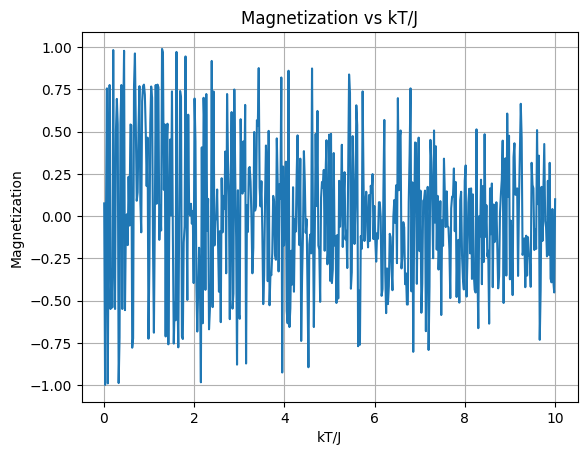

In [56]:
temperatures = np.linspace(0.1, 10.1,100)
val=[]
# for temp in temperatures:
#     list=Ising_MonteCarlo(13,0, 100,temp)
#     val.append(sum(list[2*n//5:]) / len(list[2*n//5:]))
# plt.plot(temperatures, val)
# plt.grid(True)
# plt.show()

num_steps = 100
J = 1.0
h = 0.0
kT_J = np.linspace(0.01, 10, num=500)  
magnetization = []

for temperature in kT_J:
    temperature = temperature * J  
    mag = Ising_MonteCarlo(3, h, num_steps, temperature, J)
    magnetization.append(np.mean(mag))  
plt.plot(kT_J, magnetization)
plt.xlabel('kT/J')
plt.ylabel('Magnetization')
plt.title('Magnetization vs kT/J')
plt.grid(True)
plt.show()
